# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [8]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()
print(X.shape[0])

5


# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027204961e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.79856129989e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

b2 max relative error: 4.447687e-11
W2 max relative error: 3.440708e-09
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738422e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

5
Final training loss:  0.0171496079387


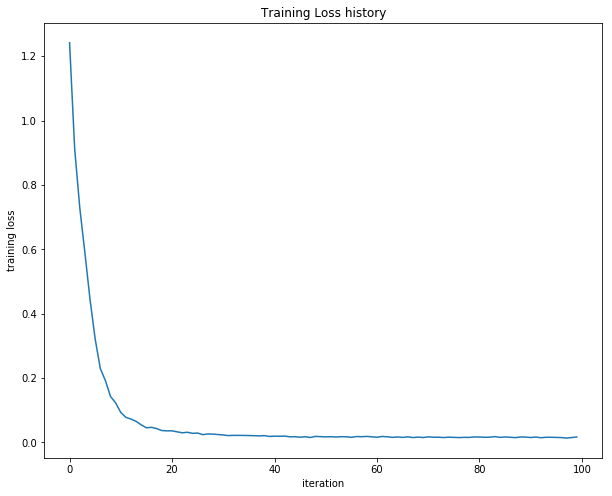

In [14]:
net = init_toy_model()
print(X.shape[0])
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [16]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    #cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    cifar10_dir = r'C:\Users\uids6815\Linux\cs231n\hw\1516\assignment1\datasets\cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000L, 3072L)
Train labels shape:  (49000L,)
Validation data shape:  (1000L, 3072L)
Validation labels shape:  (1000L,)
Test data shape:  (1000L, 3072L)
Test labels shape:  (1000L,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [17]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

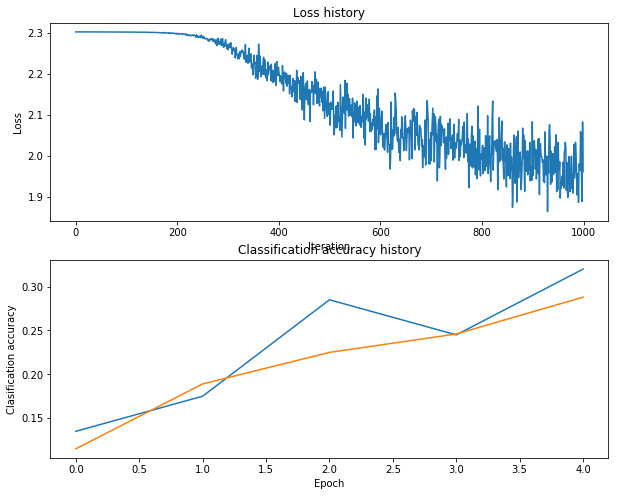

In [18]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

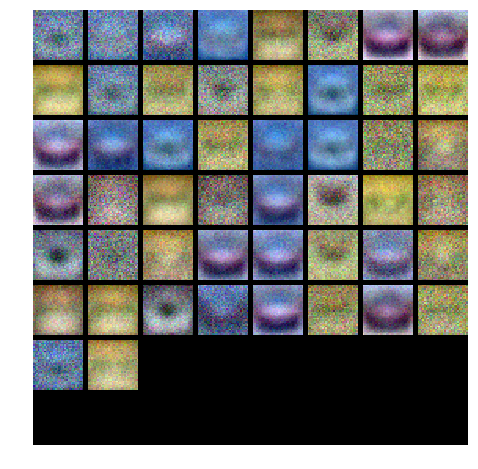

In [19]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

 hidden_size: 100, batch_size: 200, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.303391
iteration 100 / 1000: loss 1.953561
iteration 200 / 1000: loss 1.691742
iteration 300 / 1000: loss 1.639860
iteration 400 / 1000: loss 1.579125
iteration 500 / 1000: loss 1.684517
iteration 600 / 1000: loss 1.493733
iteration 700 / 1000: loss 1.407723
iteration 800 / 1000: loss 1.543416
iteration 900 / 1000: loss 1.552795
Validation accuracy:  0.468


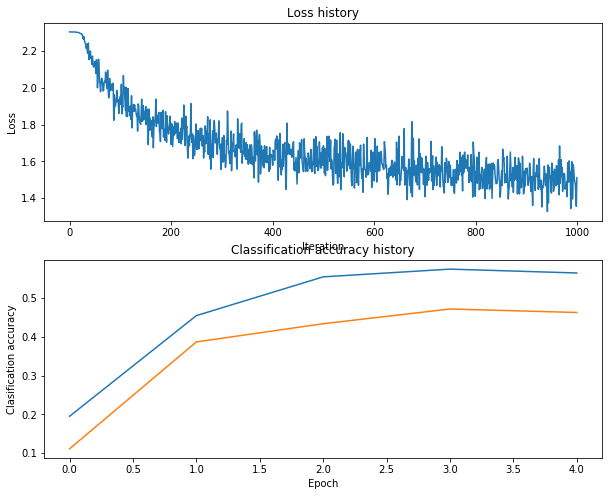

 hidden_size: 100, batch_size: 200, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.303336
iteration 100 / 1000: loss 1.695911
iteration 200 / 1000: loss 1.694075
iteration 300 / 1000: loss 1.705555
iteration 400 / 1000: loss 1.606225
iteration 500 / 1000: loss 1.482207
iteration 600 / 1000: loss 1.718852
iteration 700 / 1000: loss 1.495401
iteration 800 / 1000: loss 1.524778
iteration 900 / 1000: loss 1.610042
Validation accuracy:  0.473


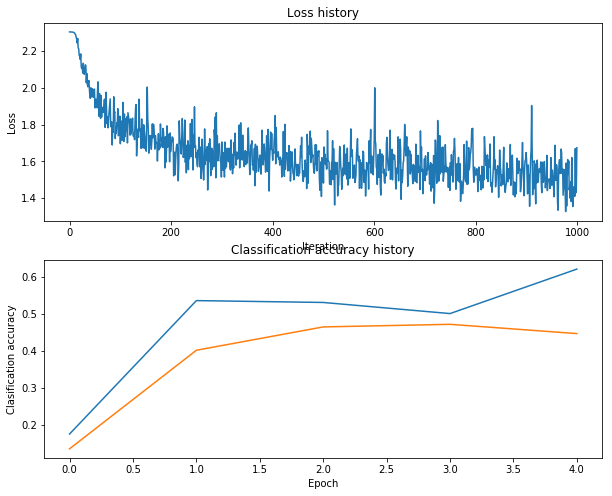

 hidden_size: 100, batch_size: 200, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.303396
iteration 100 / 1000: loss 1.928217
iteration 200 / 1000: loss 1.735089
iteration 300 / 1000: loss 1.704694
iteration 400 / 1000: loss 1.690752
iteration 500 / 1000: loss 1.815298
iteration 600 / 1000: loss 1.738130
iteration 700 / 1000: loss 1.527433
iteration 800 / 1000: loss 1.672440
iteration 900 / 1000: loss 1.676410
Validation accuracy:  0.427


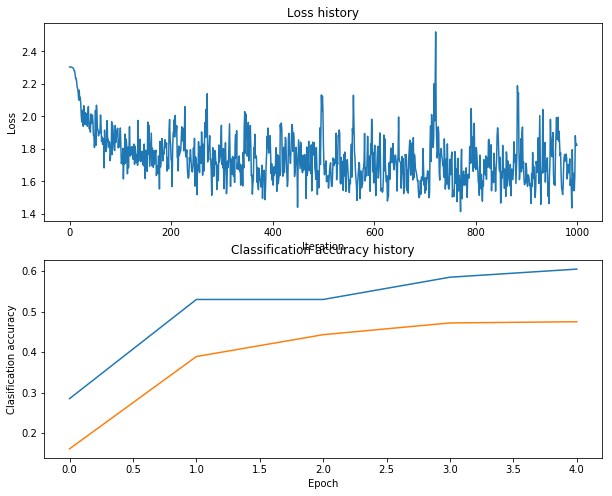

 hidden_size: 100, batch_size: 300, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.303359
iteration 100 / 1000: loss 1.914430
iteration 200 / 1000: loss 1.747686
iteration 300 / 1000: loss 1.705415
iteration 400 / 1000: loss 1.657380
iteration 500 / 1000: loss 1.660078
iteration 600 / 1000: loss 1.564313
iteration 700 / 1000: loss 1.512918
iteration 800 / 1000: loss 1.513454
iteration 900 / 1000: loss 1.406816
Validation accuracy:  0.487


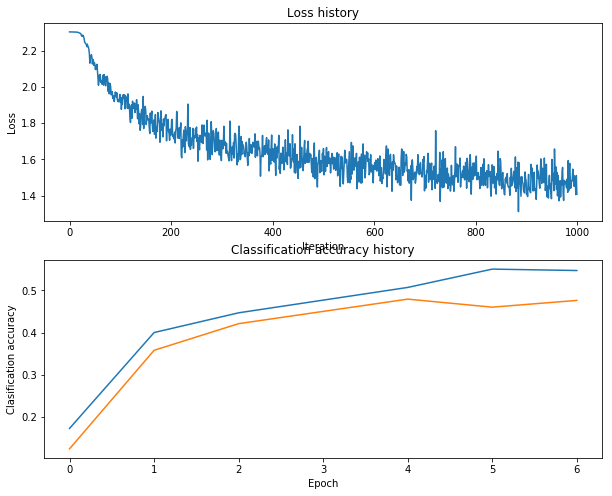

 hidden_size: 100, batch_size: 300, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.303347
iteration 100 / 1000: loss 1.839234
iteration 200 / 1000: loss 1.652222
iteration 300 / 1000: loss 1.541506
iteration 400 / 1000: loss 1.484059
iteration 500 / 1000: loss 1.463794
iteration 600 / 1000: loss 1.551852
iteration 700 / 1000: loss 1.428493
iteration 800 / 1000: loss 1.446824
iteration 900 / 1000: loss 1.472265
Validation accuracy:  0.486


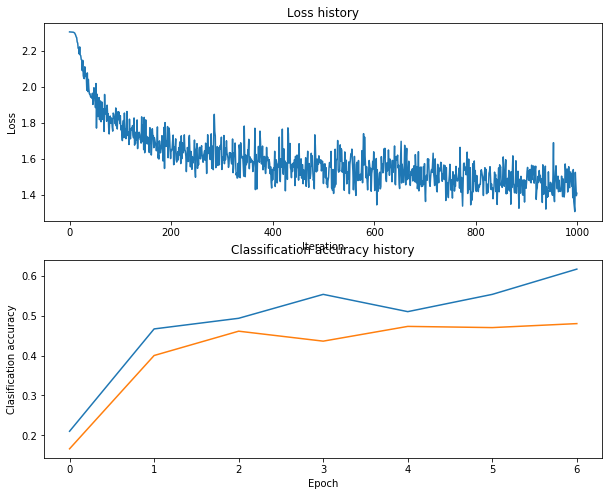

 hidden_size: 100, batch_size: 300, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.303356
iteration 100 / 1000: loss 1.939110
iteration 200 / 1000: loss 1.652201
iteration 300 / 1000: loss 1.638973
iteration 400 / 1000: loss 1.591832
iteration 500 / 1000: loss 1.765073
iteration 600 / 1000: loss 1.598414
iteration 700 / 1000: loss 1.530135
iteration 800 / 1000: loss 1.590418
iteration 900 / 1000: loss 1.552134
Validation accuracy:  0.44


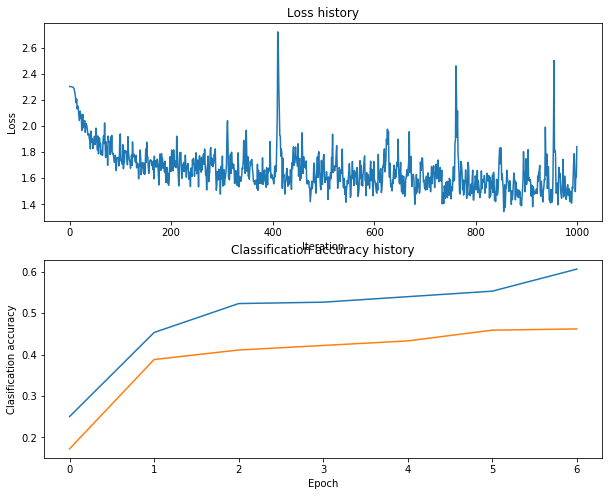

 hidden_size: 100, batch_size: 400, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.303366
iteration 100 / 1000: loss 1.915421
iteration 200 / 1000: loss 1.704424
iteration 300 / 1000: loss 1.647260
iteration 400 / 1000: loss 1.638180
iteration 500 / 1000: loss 1.566186
iteration 600 / 1000: loss 1.446499
iteration 700 / 1000: loss 1.501347
iteration 800 / 1000: loss 1.523564
iteration 900 / 1000: loss 1.501411
Validation accuracy:  0.49


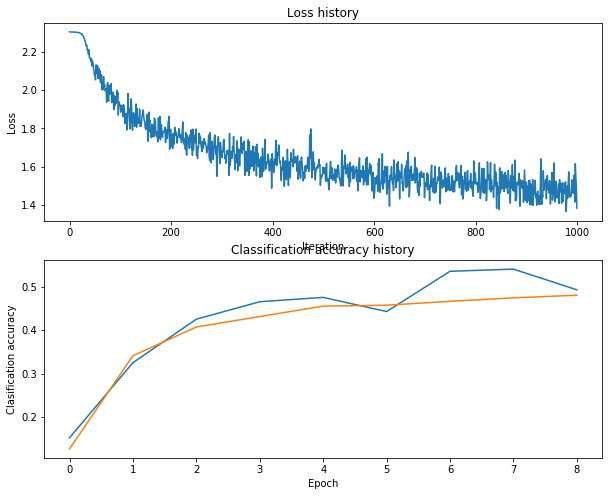

 hidden_size: 100, batch_size: 400, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.303361
iteration 100 / 1000: loss 1.855293
iteration 200 / 1000: loss 1.640861
iteration 300 / 1000: loss 1.601116
iteration 400 / 1000: loss 1.579611
iteration 500 / 1000: loss 1.552852
iteration 600 / 1000: loss 1.445039
iteration 700 / 1000: loss 1.391710
iteration 800 / 1000: loss 1.581673
iteration 900 / 1000: loss 1.420837
Validation accuracy:  0.51


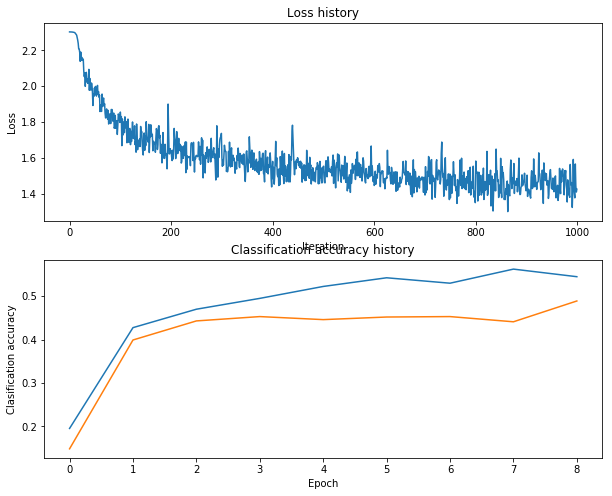

 hidden_size: 100, batch_size: 400, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.303355
iteration 100 / 1000: loss 1.742603
iteration 200 / 1000: loss 1.635900
iteration 300 / 1000: loss 1.605690
iteration 400 / 1000: loss 1.581053
iteration 500 / 1000: loss 1.532104
iteration 600 / 1000: loss 1.515260
iteration 700 / 1000: loss 1.557801
iteration 800 / 1000: loss 1.490400
iteration 900 / 1000: loss 1.503911
Validation accuracy:  0.478


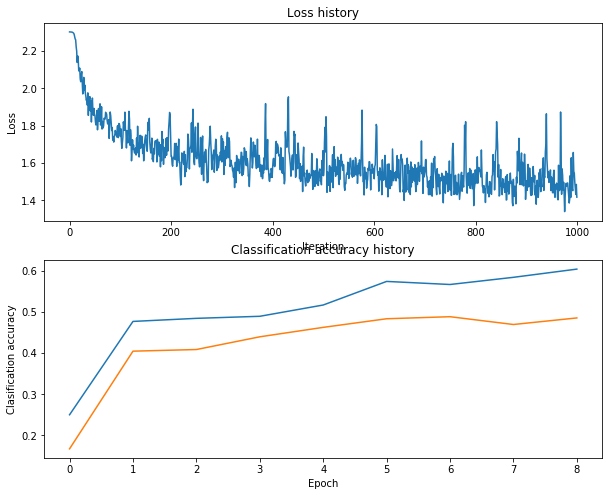

 hidden_size: 100, batch_size: 500, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.303369
iteration 100 / 1000: loss 1.852632
iteration 200 / 1000: loss 1.749391
iteration 300 / 1000: loss 1.642918
iteration 400 / 1000: loss 1.589154
iteration 500 / 1000: loss 1.535076
iteration 600 / 1000: loss 1.619166
iteration 700 / 1000: loss 1.627568
iteration 800 / 1000: loss 1.494620
iteration 900 / 1000: loss 1.591907
Validation accuracy:  0.481


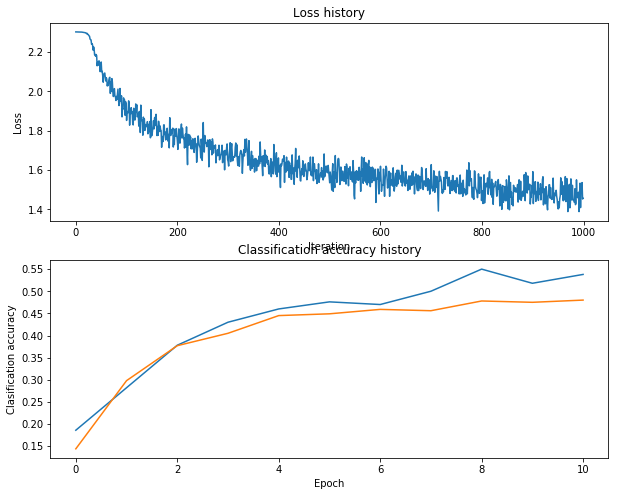

 hidden_size: 100, batch_size: 500, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.303342
iteration 100 / 1000: loss 1.776881
iteration 200 / 1000: loss 1.578731
iteration 300 / 1000: loss 1.553047
iteration 400 / 1000: loss 1.563614
iteration 500 / 1000: loss 1.473035
iteration 600 / 1000: loss 1.592346
iteration 700 / 1000: loss 1.467094
iteration 800 / 1000: loss 1.388602
iteration 900 / 1000: loss 1.432807
Validation accuracy:  0.505


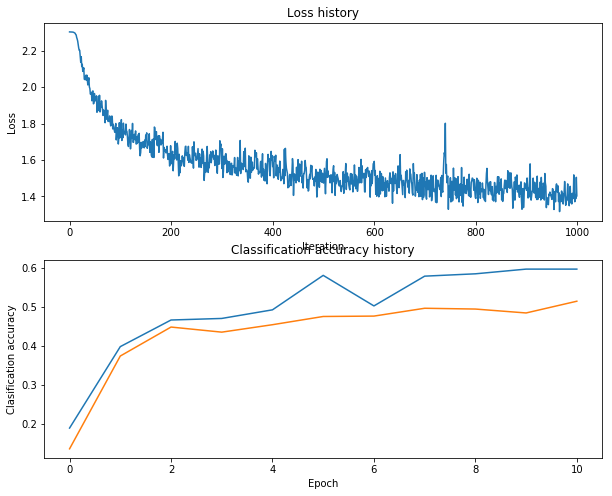

 hidden_size: 100, batch_size: 500, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.303358
iteration 100 / 1000: loss 1.835909
iteration 200 / 1000: loss 1.563375
iteration 300 / 1000: loss 1.526592
iteration 400 / 1000: loss 1.604433
iteration 500 / 1000: loss 1.516696
iteration 600 / 1000: loss 1.496254
iteration 700 / 1000: loss 1.497841
iteration 800 / 1000: loss 1.473091
iteration 900 / 1000: loss 1.469959
Validation accuracy:  0.497


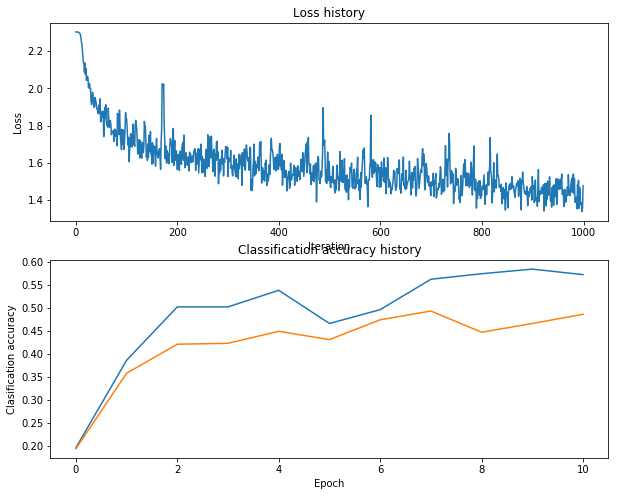

 hidden_size: 200, batch_size: 200, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.304132
iteration 100 / 1000: loss 1.930996
iteration 200 / 1000: loss 1.702163
iteration 300 / 1000: loss 1.677654
iteration 400 / 1000: loss 1.763811
iteration 500 / 1000: loss 1.553148
iteration 600 / 1000: loss 1.682302
iteration 700 / 1000: loss 1.486147
iteration 800 / 1000: loss 1.524142
iteration 900 / 1000: loss 1.431606
Validation accuracy:  0.474


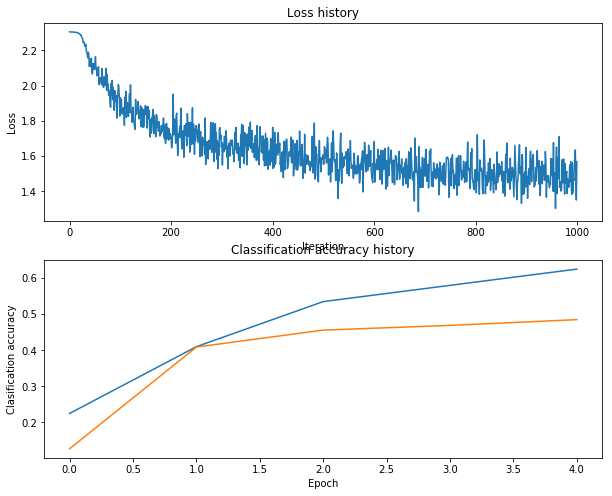

 hidden_size: 200, batch_size: 200, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.304157
iteration 100 / 1000: loss 1.683091
iteration 200 / 1000: loss 1.685205
iteration 300 / 1000: loss 1.693778
iteration 400 / 1000: loss 1.632034
iteration 500 / 1000: loss 1.453453
iteration 600 / 1000: loss 1.529512
iteration 700 / 1000: loss 1.569110
iteration 800 / 1000: loss 1.542324
iteration 900 / 1000: loss 1.548688
Validation accuracy:  0.467


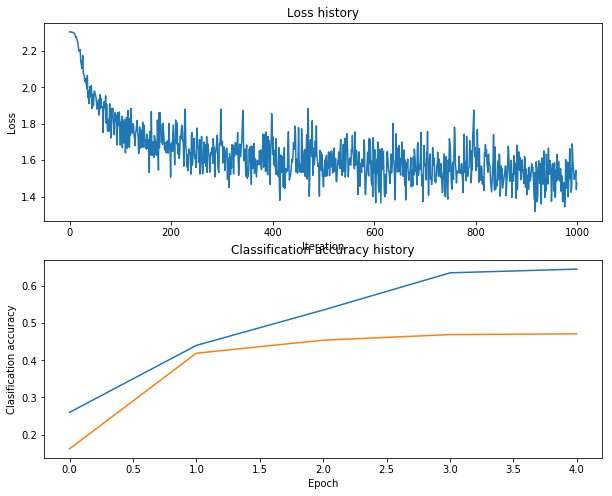

 hidden_size: 200, batch_size: 200, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.304096
iteration 100 / 1000: loss 1.721006
iteration 200 / 1000: loss 1.915599
iteration 300 / 1000: loss 1.975256
iteration 400 / 1000: loss 1.771559
iteration 500 / 1000: loss 1.709828
iteration 600 / 1000: loss 1.797910
iteration 700 / 1000: loss 1.853186
iteration 800 / 1000: loss 1.784608
iteration 900 / 1000: loss 1.718212
Validation accuracy:  0.449


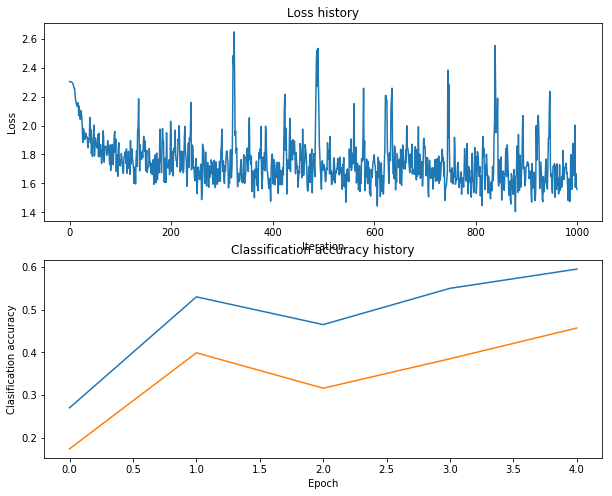

 hidden_size: 200, batch_size: 300, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.304147
iteration 100 / 1000: loss 1.940792
iteration 200 / 1000: loss 1.719040
iteration 300 / 1000: loss 1.611826
iteration 400 / 1000: loss 1.664166
iteration 500 / 1000: loss 1.595919
iteration 600 / 1000: loss 1.553708
iteration 700 / 1000: loss 1.516717
iteration 800 / 1000: loss 1.481726
iteration 900 / 1000: loss 1.506343
Validation accuracy:  0.493


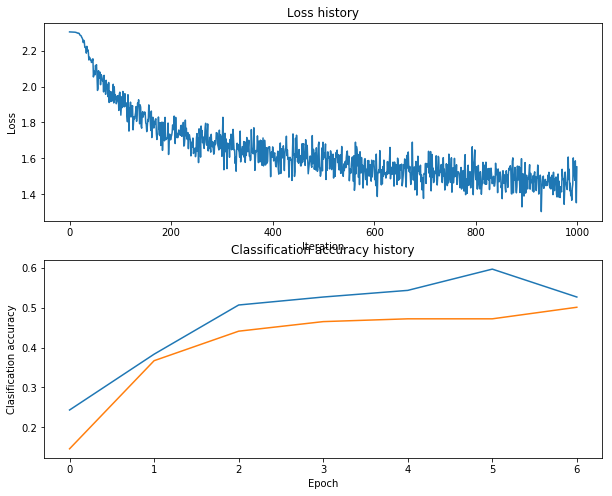

 hidden_size: 200, batch_size: 300, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.304133
iteration 100 / 1000: loss 1.811647
iteration 200 / 1000: loss 1.645907
iteration 300 / 1000: loss 1.499716
iteration 400 / 1000: loss 1.519492
iteration 500 / 1000: loss 1.621501
iteration 600 / 1000: loss 1.520066
iteration 700 / 1000: loss 1.518722
iteration 800 / 1000: loss 1.520763
iteration 900 / 1000: loss 1.455984
Validation accuracy:  0.465


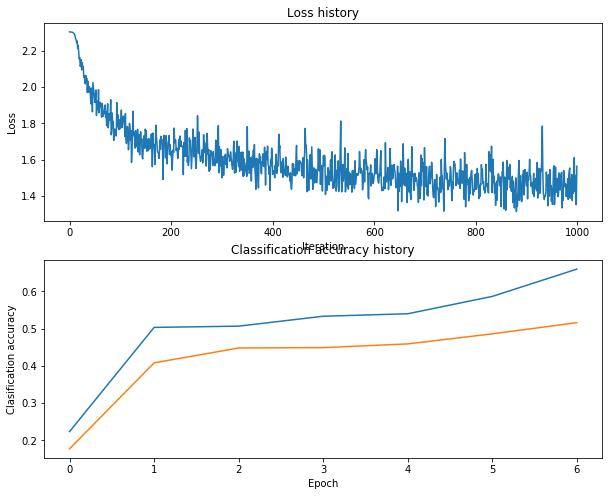

 hidden_size: 200, batch_size: 300, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.304121
iteration 100 / 1000: loss 1.787881
iteration 200 / 1000: loss 1.667997
iteration 300 / 1000: loss 1.647416
iteration 400 / 1000: loss 1.742662
iteration 500 / 1000: loss 1.506858
iteration 600 / 1000: loss 1.702778
iteration 700 / 1000: loss 1.539438
iteration 800 / 1000: loss 1.507596
iteration 900 / 1000: loss 1.471222
Validation accuracy:  0.468


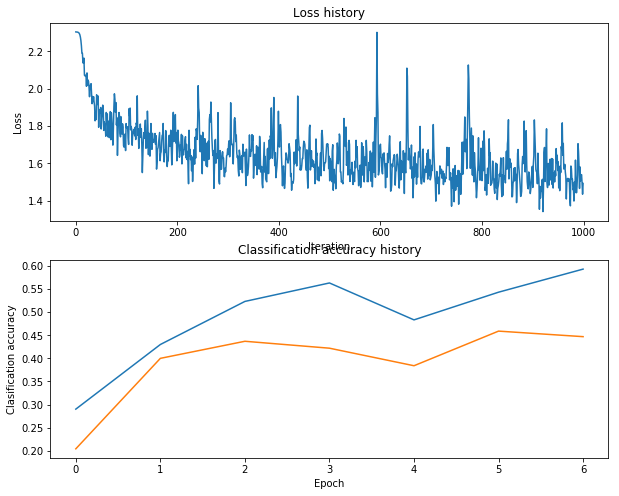

 hidden_size: 200, batch_size: 400, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.304140
iteration 100 / 1000: loss 1.914684
iteration 200 / 1000: loss 1.760831
iteration 300 / 1000: loss 1.697540
iteration 400 / 1000: loss 1.647418
iteration 500 / 1000: loss 1.632281
iteration 600 / 1000: loss 1.569958
iteration 700 / 1000: loss 1.575167
iteration 800 / 1000: loss 1.484089
iteration 900 / 1000: loss 1.508985
Validation accuracy:  0.483


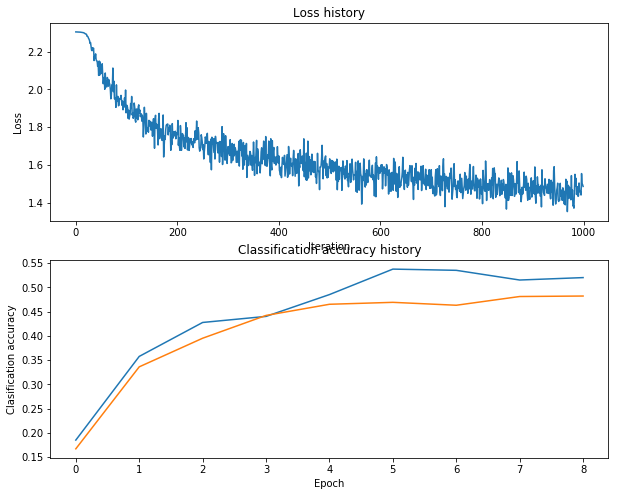

 hidden_size: 200, batch_size: 400, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.304106
iteration 100 / 1000: loss 1.783931
iteration 200 / 1000: loss 1.640943
iteration 300 / 1000: loss 1.587564
iteration 400 / 1000: loss 1.628885
iteration 500 / 1000: loss 1.513401
iteration 600 / 1000: loss 1.420912
iteration 700 / 1000: loss 1.522508
iteration 800 / 1000: loss 1.438514
iteration 900 / 1000: loss 1.463686
Validation accuracy:  0.507


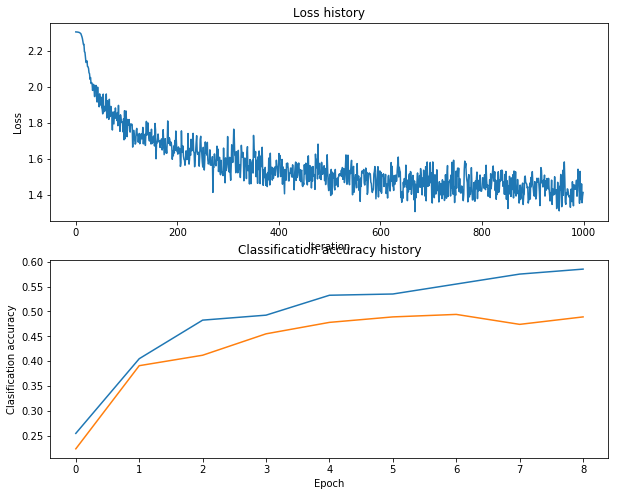

 hidden_size: 200, batch_size: 400, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.304130
iteration 100 / 1000: loss 1.691541
iteration 200 / 1000: loss 1.578443
iteration 300 / 1000: loss 1.558143
iteration 400 / 1000: loss 1.541682
iteration 500 / 1000: loss 1.553209
iteration 600 / 1000: loss 1.696875
iteration 700 / 1000: loss 1.493664
iteration 800 / 1000: loss 1.406349
iteration 900 / 1000: loss 1.413365
Validation accuracy:  0.45


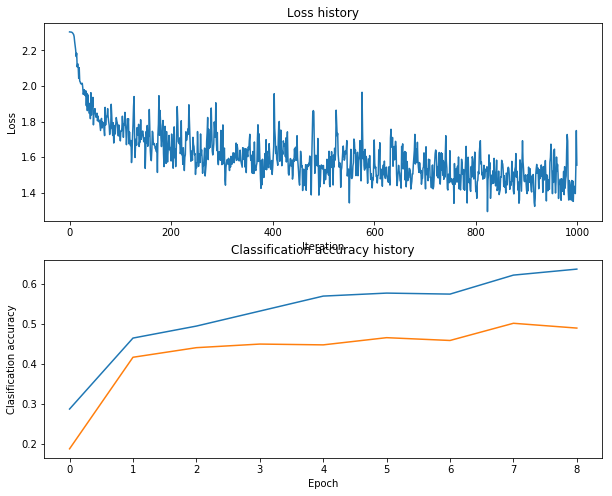

 hidden_size: 200, batch_size: 500, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.304117
iteration 100 / 1000: loss 1.859140
iteration 200 / 1000: loss 1.721713
iteration 300 / 1000: loss 1.714412
iteration 400 / 1000: loss 1.612023
iteration 500 / 1000: loss 1.505299
iteration 600 / 1000: loss 1.557875
iteration 700 / 1000: loss 1.446846
iteration 800 / 1000: loss 1.522456
iteration 900 / 1000: loss 1.506647
Validation accuracy:  0.491


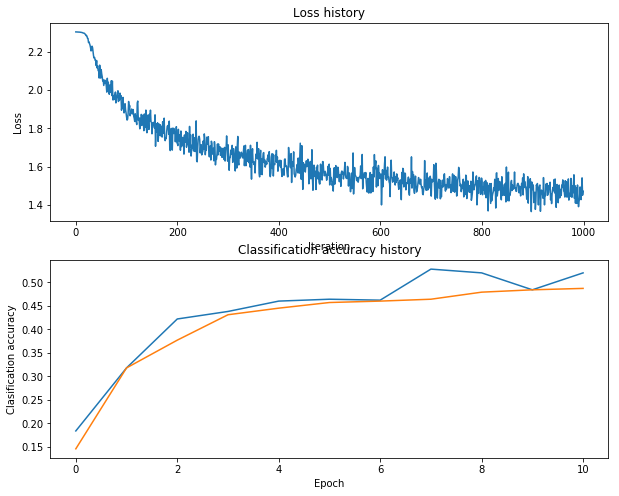

 hidden_size: 200, batch_size: 500, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.304066
iteration 100 / 1000: loss 1.809090
iteration 200 / 1000: loss 1.563628
iteration 300 / 1000: loss 1.544755
iteration 400 / 1000: loss 1.495057
iteration 500 / 1000: loss 1.500109
iteration 600 / 1000: loss 1.420214
iteration 700 / 1000: loss 1.437717
iteration 800 / 1000: loss 1.463520
iteration 900 / 1000: loss 1.486596
Validation accuracy:  0.524


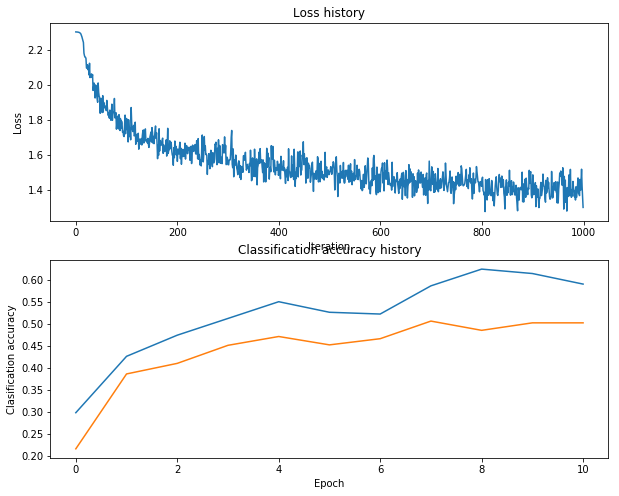

 hidden_size: 200, batch_size: 500, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.304139
iteration 100 / 1000: loss 1.731131
iteration 200 / 1000: loss 1.603103
iteration 300 / 1000: loss 1.545099
iteration 400 / 1000: loss 1.566429
iteration 500 / 1000: loss 1.514702
iteration 600 / 1000: loss 1.450440
iteration 700 / 1000: loss 1.499433
iteration 800 / 1000: loss 1.604210
iteration 900 / 1000: loss 1.451012
Validation accuracy:  0.506


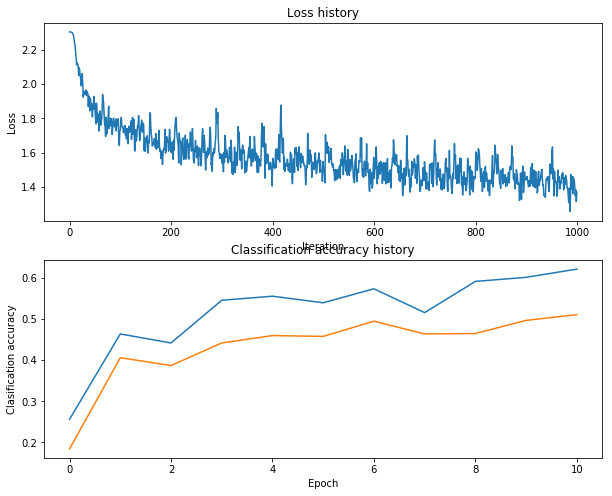

 hidden_size: 300, batch_size: 200, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.304887
iteration 100 / 1000: loss 1.933884
iteration 200 / 1000: loss 1.720916
iteration 300 / 1000: loss 1.603482
iteration 400 / 1000: loss 1.539598
iteration 500 / 1000: loss 1.618109
iteration 600 / 1000: loss 1.383852
iteration 700 / 1000: loss 1.551568
iteration 800 / 1000: loss 1.360868
iteration 900 / 1000: loss 1.527559
Validation accuracy:  0.47


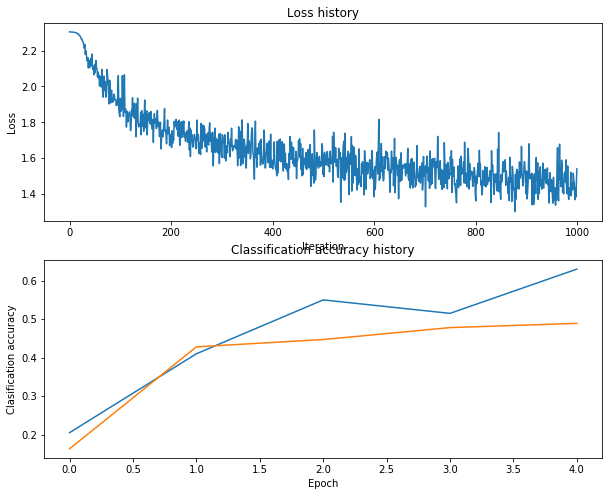

 hidden_size: 300, batch_size: 200, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.304905
iteration 100 / 1000: loss 1.791498
iteration 200 / 1000: loss 1.754454
iteration 300 / 1000: loss 1.627841
iteration 400 / 1000: loss 1.445419
iteration 500 / 1000: loss 1.344039
iteration 600 / 1000: loss 1.642820
iteration 700 / 1000: loss 1.570339
iteration 800 / 1000: loss 1.510262
iteration 900 / 1000: loss 1.564651
Validation accuracy:  0.461


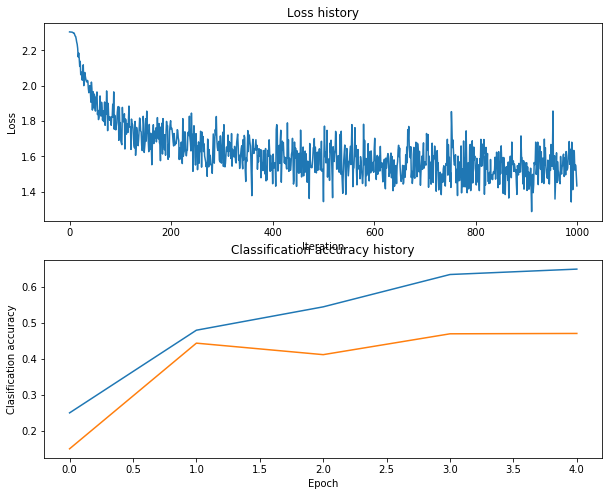

 hidden_size: 300, batch_size: 200, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.304890
iteration 100 / 1000: loss 1.848144
iteration 200 / 1000: loss 1.764795
iteration 300 / 1000: loss 1.795751
iteration 400 / 1000: loss 1.701061
iteration 500 / 1000: loss 1.638552
iteration 600 / 1000: loss 1.687560
iteration 700 / 1000: loss 1.678503
iteration 800 / 1000: loss 1.998506
iteration 900 / 1000: loss 1.645202
Validation accuracy:  0.412


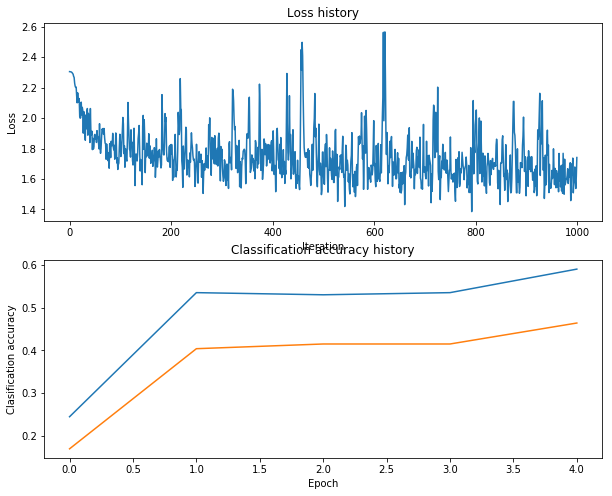

 hidden_size: 300, batch_size: 300, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.304932
iteration 100 / 1000: loss 1.864174
iteration 200 / 1000: loss 1.812898
iteration 300 / 1000: loss 1.701715
iteration 400 / 1000: loss 1.635282
iteration 500 / 1000: loss 1.584845
iteration 600 / 1000: loss 1.598826
iteration 700 / 1000: loss 1.554362
iteration 800 / 1000: loss 1.412987
iteration 900 / 1000: loss 1.636954
Validation accuracy:  0.5


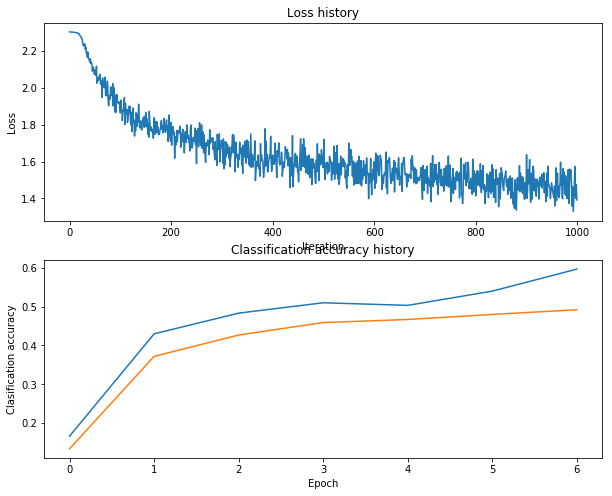

 hidden_size: 300, batch_size: 300, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.304853
iteration 100 / 1000: loss 1.709050
iteration 200 / 1000: loss 1.615549
iteration 300 / 1000: loss 1.593350
iteration 400 / 1000: loss 1.536158
iteration 500 / 1000: loss 1.549510
iteration 600 / 1000: loss 1.455044
iteration 700 / 1000: loss 1.468523
iteration 800 / 1000: loss 1.512624
iteration 900 / 1000: loss 1.438856
Validation accuracy:  0.487


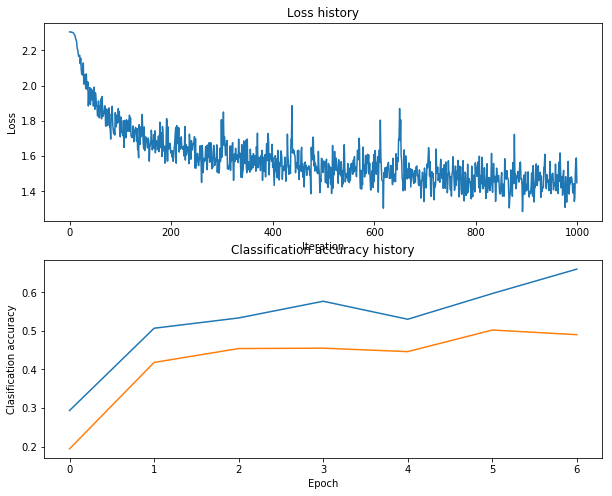

 hidden_size: 300, batch_size: 300, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.304919
iteration 100 / 1000: loss 1.863567
iteration 200 / 1000: loss 1.720451
iteration 300 / 1000: loss 1.586191
iteration 400 / 1000: loss 1.722669
iteration 500 / 1000: loss 1.736072
iteration 600 / 1000: loss 1.664425
iteration 700 / 1000: loss 1.544881
iteration 800 / 1000: loss 1.514328
iteration 900 / 1000: loss 1.660956
Validation accuracy:  0.47


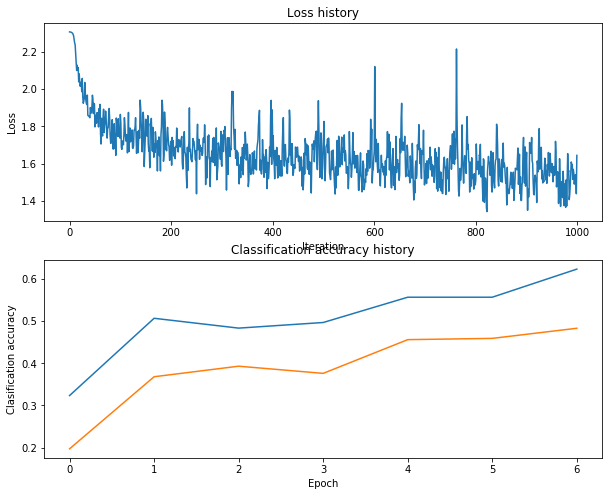

 hidden_size: 300, batch_size: 400, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.304915
iteration 100 / 1000: loss 1.954392
iteration 200 / 1000: loss 1.751175
iteration 300 / 1000: loss 1.666234
iteration 400 / 1000: loss 1.593711
iteration 500 / 1000: loss 1.452773
iteration 600 / 1000: loss 1.562446
iteration 700 / 1000: loss 1.441727
iteration 800 / 1000: loss 1.558406
iteration 900 / 1000: loss 1.464280
Validation accuracy:  0.5


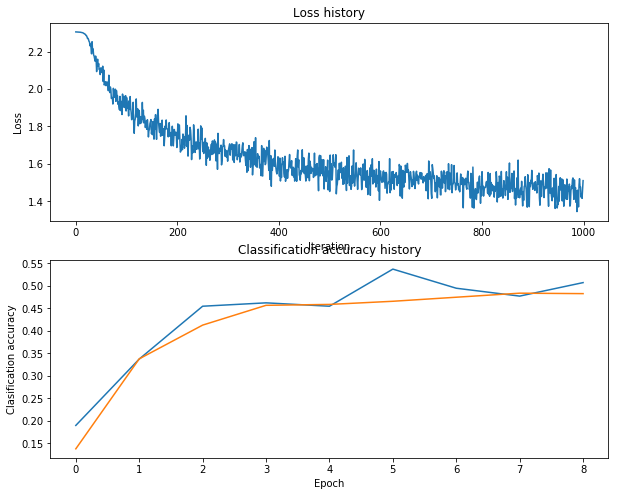

 hidden_size: 300, batch_size: 400, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.304880
iteration 100 / 1000: loss 1.762860
iteration 200 / 1000: loss 1.616546
iteration 300 / 1000: loss 1.672441
iteration 400 / 1000: loss 1.554151
iteration 500 / 1000: loss 1.451964
iteration 600 / 1000: loss 1.331357
iteration 700 / 1000: loss 1.325100
iteration 800 / 1000: loss 1.437473
iteration 900 / 1000: loss 1.491822
Validation accuracy:  0.481


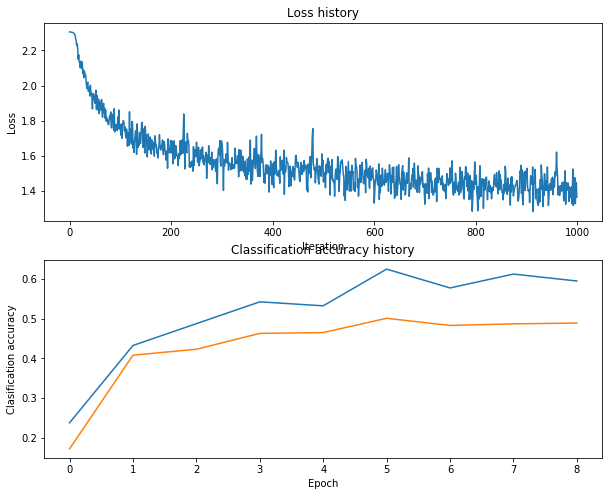

 hidden_size: 300, batch_size: 400, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.304932
iteration 100 / 1000: loss 1.857713
iteration 200 / 1000: loss 1.889611
iteration 300 / 1000: loss 1.579848
iteration 400 / 1000: loss 1.559944
iteration 500 / 1000: loss 1.656498
iteration 600 / 1000: loss 1.451008
iteration 700 / 1000: loss 1.609310
iteration 800 / 1000: loss 1.424267
iteration 900 / 1000: loss 1.551132
Validation accuracy:  0.512


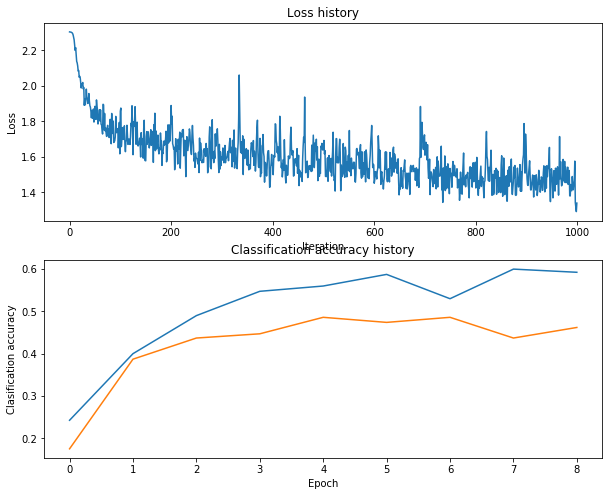

 hidden_size: 300, batch_size: 500, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.304887
iteration 100 / 1000: loss 1.881161
iteration 200 / 1000: loss 1.722188
iteration 300 / 1000: loss 1.667221
iteration 400 / 1000: loss 1.587910
iteration 500 / 1000: loss 1.636319
iteration 600 / 1000: loss 1.561146
iteration 700 / 1000: loss 1.593702
iteration 800 / 1000: loss 1.504391
iteration 900 / 1000: loss 1.489189
Validation accuracy:  0.496


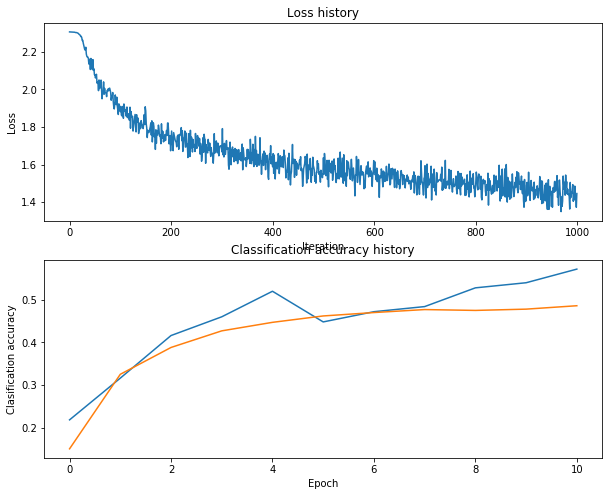

 hidden_size: 300, batch_size: 500, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.304854
iteration 100 / 1000: loss 1.702024
iteration 200 / 1000: loss 1.662131
iteration 300 / 1000: loss 1.576217
iteration 400 / 1000: loss 1.561891
iteration 500 / 1000: loss 1.485647
iteration 600 / 1000: loss 1.348056
iteration 700 / 1000: loss 1.417570
iteration 800 / 1000: loss 1.420893
iteration 900 / 1000: loss 1.472827
Validation accuracy:  0.51


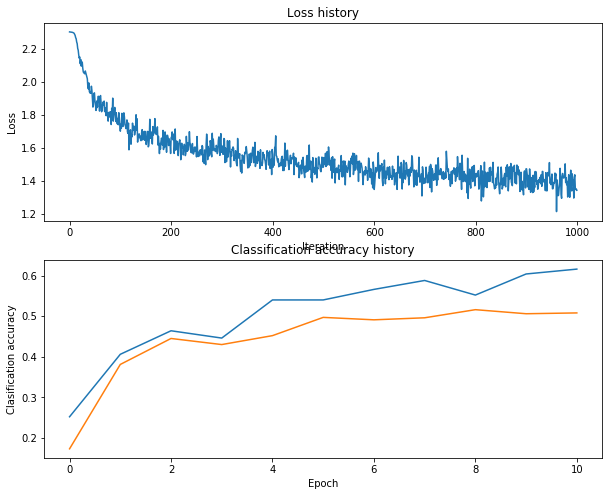

 hidden_size: 300, batch_size: 500, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.304878
iteration 100 / 1000: loss 1.708173
iteration 200 / 1000: loss 1.539651
iteration 300 / 1000: loss 1.717790
iteration 400 / 1000: loss 1.540982
iteration 500 / 1000: loss 1.511412
iteration 600 / 1000: loss 1.504856
iteration 700 / 1000: loss 1.426908
iteration 800 / 1000: loss 1.402759
iteration 900 / 1000: loss 1.342406
Validation accuracy:  0.485


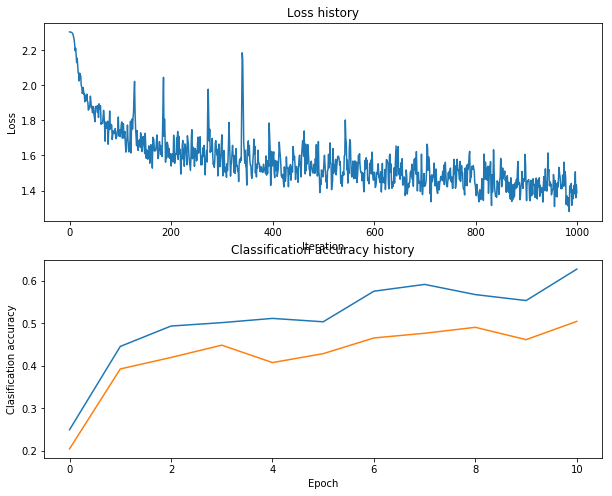

 hidden_size: 400, batch_size: 200, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.305725
iteration 100 / 1000: loss 1.923018
iteration 200 / 1000: loss 1.782554
iteration 300 / 1000: loss 1.701665
iteration 400 / 1000: loss 1.664284
iteration 500 / 1000: loss 1.668110
iteration 600 / 1000: loss 1.572762
iteration 700 / 1000: loss 1.500122
iteration 800 / 1000: loss 1.566171
iteration 900 / 1000: loss 1.447812
Validation accuracy:  0.491


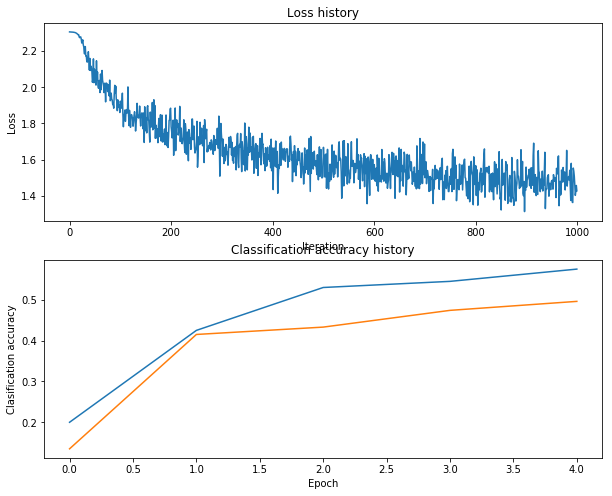

 hidden_size: 400, batch_size: 200, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.305667
iteration 100 / 1000: loss 1.865126
iteration 200 / 1000: loss 1.668413
iteration 300 / 1000: loss 1.690514
iteration 400 / 1000: loss 1.730071
iteration 500 / 1000: loss 1.519091
iteration 600 / 1000: loss 1.506980
iteration 700 / 1000: loss 1.646124
iteration 800 / 1000: loss 1.628539
iteration 900 / 1000: loss 1.508654
Validation accuracy:  0.474


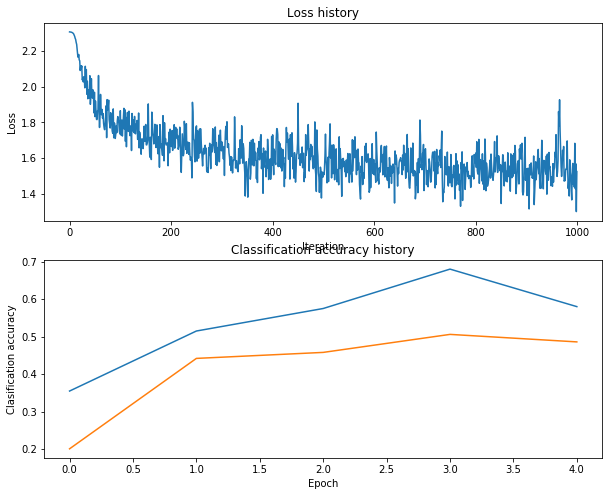

 hidden_size: 400, batch_size: 200, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.305610
iteration 100 / 1000: loss 1.852892
iteration 200 / 1000: loss 1.852444
iteration 300 / 1000: loss 1.549421
iteration 400 / 1000: loss 1.762337
iteration 500 / 1000: loss 1.793482
iteration 600 / 1000: loss 1.715111
iteration 700 / 1000: loss 1.652529
iteration 800 / 1000: loss 1.621023
iteration 900 / 1000: loss 1.788285
Validation accuracy:  0.407


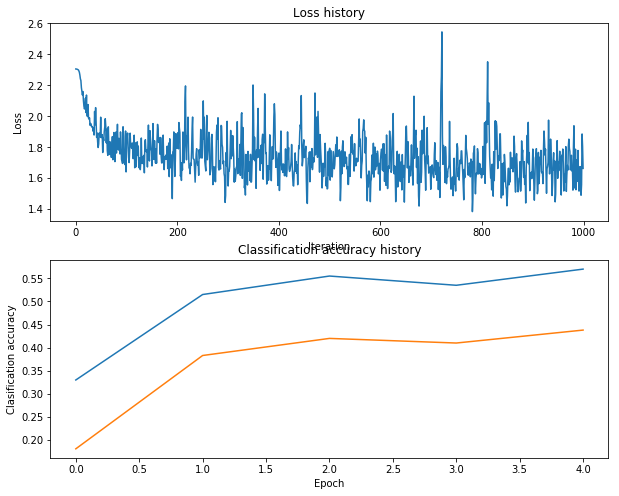

 hidden_size: 400, batch_size: 300, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.305600
iteration 100 / 1000: loss 1.939714
iteration 200 / 1000: loss 1.760178
iteration 300 / 1000: loss 1.706103
iteration 400 / 1000: loss 1.547262
iteration 500 / 1000: loss 1.604843
iteration 600 / 1000: loss 1.532897
iteration 700 / 1000: loss 1.446026
iteration 800 / 1000: loss 1.476595
iteration 900 / 1000: loss 1.451089
Validation accuracy:  0.487


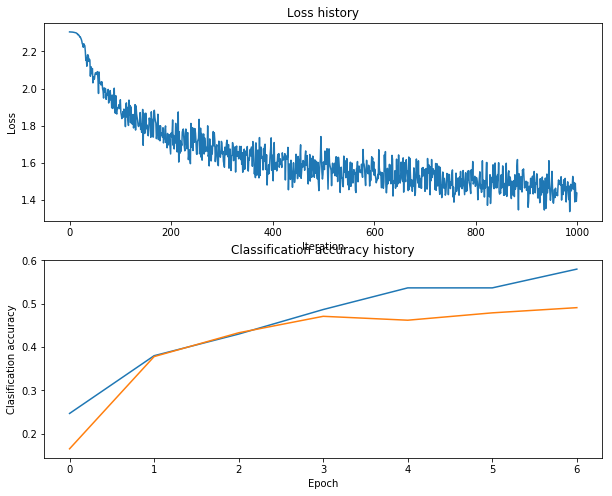

 hidden_size: 400, batch_size: 300, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.305716
iteration 100 / 1000: loss 1.752508
iteration 200 / 1000: loss 1.638599
iteration 300 / 1000: loss 1.537155
iteration 400 / 1000: loss 1.491012
iteration 500 / 1000: loss 1.536223
iteration 600 / 1000: loss 1.533574
iteration 700 / 1000: loss 1.485248
iteration 800 / 1000: loss 1.387157
iteration 900 / 1000: loss 1.680865
Validation accuracy:  0.497


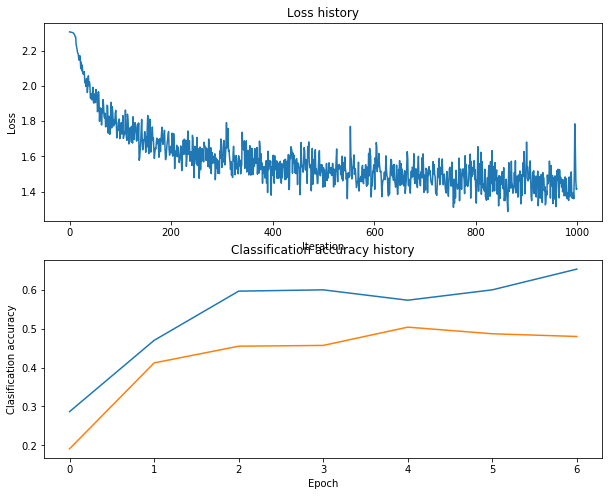

 hidden_size: 400, batch_size: 300, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.305660
iteration 100 / 1000: loss 1.872561
iteration 200 / 1000: loss 1.748148
iteration 300 / 1000: loss 1.704845
iteration 400 / 1000: loss 1.615734
iteration 500 / 1000: loss 1.562586
iteration 600 / 1000: loss 1.648112
iteration 700 / 1000: loss 1.592280
iteration 800 / 1000: loss 1.612806
iteration 900 / 1000: loss 1.505053
Validation accuracy:  0.496


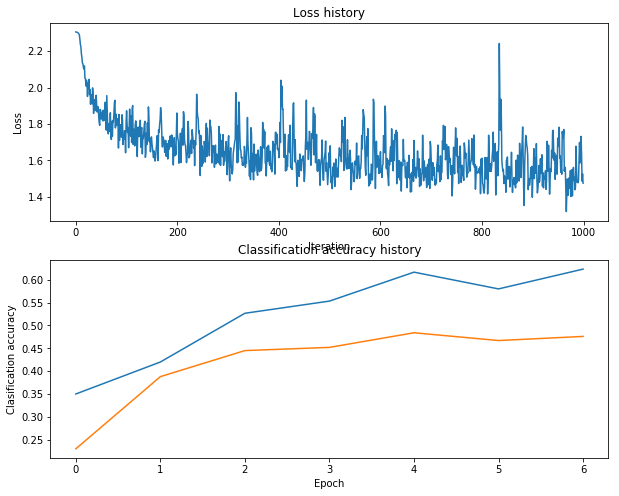

 hidden_size: 400, batch_size: 400, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.305657
iteration 100 / 1000: loss 1.939229
iteration 200 / 1000: loss 1.748492
iteration 300 / 1000: loss 1.547896
iteration 400 / 1000: loss 1.637760
iteration 500 / 1000: loss 1.565398
iteration 600 / 1000: loss 1.564802
iteration 700 / 1000: loss 1.474780
iteration 800 / 1000: loss 1.566308
iteration 900 / 1000: loss 1.418689
Validation accuracy:  0.476


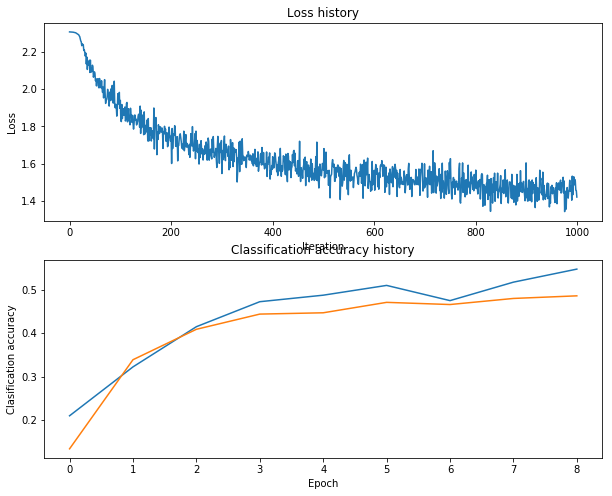

 hidden_size: 400, batch_size: 400, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.305695
iteration 100 / 1000: loss 1.725210
iteration 200 / 1000: loss 1.553950
iteration 300 / 1000: loss 1.628217
iteration 400 / 1000: loss 1.517887
iteration 500 / 1000: loss 1.570470
iteration 600 / 1000: loss 1.514515
iteration 700 / 1000: loss 1.418185
iteration 800 / 1000: loss 1.403846
iteration 900 / 1000: loss 1.357841
Validation accuracy:  0.515


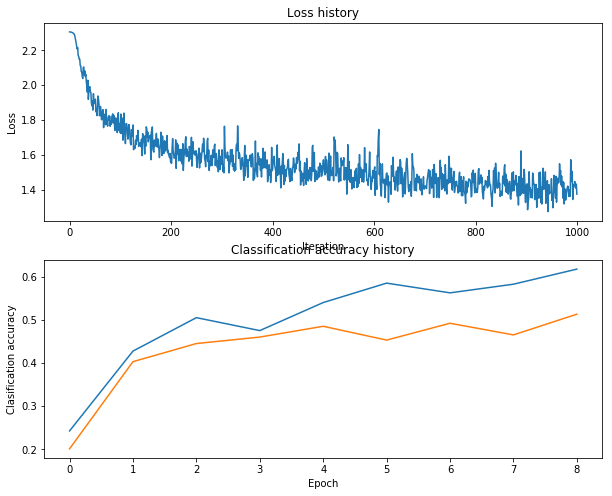

 hidden_size: 400, batch_size: 400, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.305616
iteration 100 / 1000: loss 1.681249
iteration 200 / 1000: loss 1.675794
iteration 300 / 1000: loss 1.552885
iteration 400 / 1000: loss 1.761570
iteration 500 / 1000: loss 1.532792
iteration 600 / 1000: loss 1.725450
iteration 700 / 1000: loss 1.536557
iteration 800 / 1000: loss 1.532018
iteration 900 / 1000: loss 1.494088
Validation accuracy:  0.476


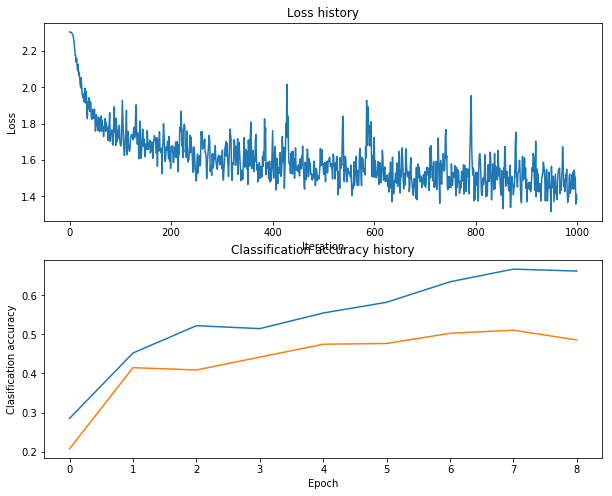

 hidden_size: 400, batch_size: 500, lr: 0.001000, reg: 0.250000
iteration 0 / 1000: loss 2.305619
iteration 100 / 1000: loss 1.887847
iteration 200 / 1000: loss 1.720370
iteration 300 / 1000: loss 1.635570
iteration 400 / 1000: loss 1.674243
iteration 500 / 1000: loss 1.682449
iteration 600 / 1000: loss 1.494507
iteration 700 / 1000: loss 1.501838
iteration 800 / 1000: loss 1.459012
iteration 900 / 1000: loss 1.402013
Validation accuracy:  0.477


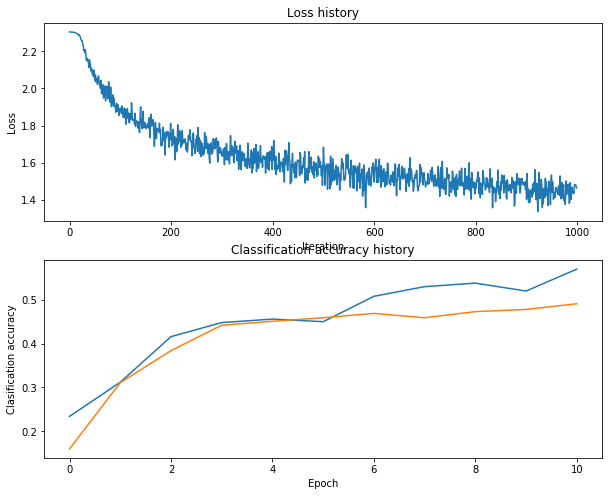

 hidden_size: 400, batch_size: 500, lr: 0.002000, reg: 0.250000
iteration 0 / 1000: loss 2.305636
iteration 100 / 1000: loss 1.719433
iteration 200 / 1000: loss 1.640759
iteration 300 / 1000: loss 1.624880
iteration 400 / 1000: loss 1.447807
iteration 500 / 1000: loss 1.418850
iteration 600 / 1000: loss 1.449196
iteration 700 / 1000: loss 1.450028
iteration 800 / 1000: loss 1.446544
iteration 900 / 1000: loss 1.406366
Validation accuracy:  0.5


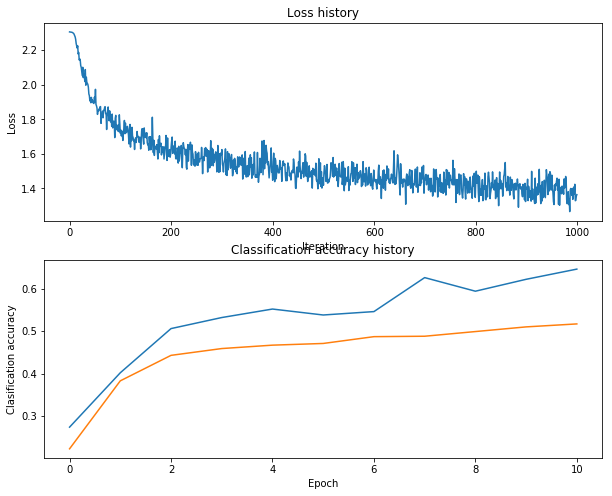

 hidden_size: 400, batch_size: 500, lr: 0.003000, reg: 0.250000
iteration 0 / 1000: loss 2.305679
iteration 100 / 1000: loss 1.684030
iteration 200 / 1000: loss 1.485035
iteration 300 / 1000: loss 1.532068
iteration 400 / 1000: loss 1.588926
iteration 500 / 1000: loss 1.461605
iteration 600 / 1000: loss 1.589498
iteration 700 / 1000: loss 1.463064
iteration 800 / 1000: loss 1.471924
iteration 900 / 1000: loss 1.441305
Validation accuracy:  0.518


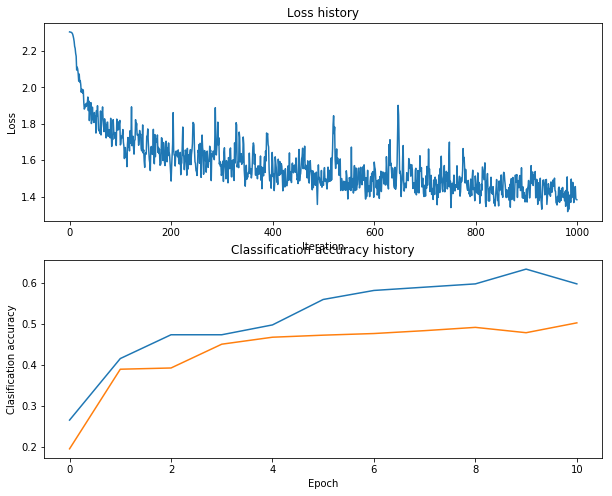

In [20]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
input_size = 32 * 32 * 3
hidden_sizes = [100, 200, 300, 400]
num_classes = 10
learning_rates = [1e-3, 2*1e-3, 3*1e-3]
regularization_strengths = [0.25]
batch_sizes = [200, 300, 400, 500]
best_val = -1

for hidden_size in hidden_sizes:
    for batch_size in batch_sizes:
        for lr in learning_rates:
            for reg in regularization_strengths:
                print(" hidden_size: %d, batch_size: %d, lr: %f, reg: %f"%(hidden_size, batch_size, lr, reg))
                net = TwoLayerNet(input_size, hidden_size, num_classes)
                # Train the network
                stats = net.train(X_train, y_train, X_val, y_val,
                            num_iters=1000, batch_size=batch_size,
                            learning_rate=lr, learning_rate_decay=0.95,
                            reg=reg, verbose=True)

                # Predict on the validation set
                val_acc = (net.predict(X_val) == y_val).mean()
                print('Validation accuracy: ', val_acc)
                if val_acc > best_val:
                    best_net = net
                    best_val = val_acc
                
                plt.subplot(2, 1, 1)
                plt.plot(stats['loss_history'])
                plt.title('Loss history')
                plt.xlabel('Iteration')
                plt.ylabel('Loss')

                plt.subplot(2, 1, 2)
                plt.plot(stats['train_acc_history'], label='train')
                plt.plot(stats['val_acc_history'], label='val')
                plt.title('Classification accuracy history')
                plt.xlabel('Epoch')
                plt.ylabel('Clasification accuracy')
                plt.show()
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

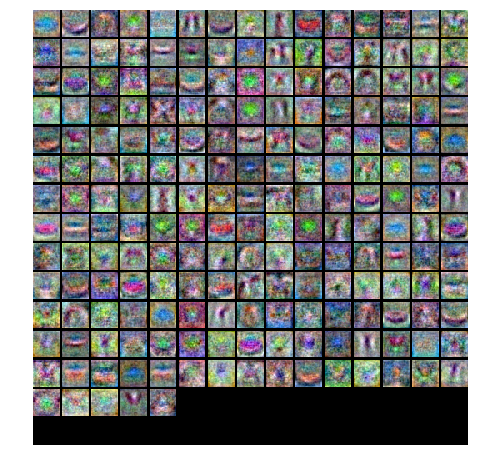

In [23]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [22]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.52
